In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
import collections
import pathlib
import re
import string
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import tensorflow_text as tf_text
from tensorflow import keras

In [2]:
tfds.disable_progress_bar()

def plot_graphs(history, metric):   #define a function to plot the history graph with accuracy and loss
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [3]:
seed = 42

train_dataset = preprocessing.text_dataset_from_directory(
    'bbcsport',
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 737 files belonging to 5 classes.
Using 590 files for training.


In [4]:
test_dataset = preprocessing.text_dataset_from_directory(
    'bbcsport',
    validation_split=.2,
    subset='validation',
    seed=seed)

Found 737 files belonging to 5 classes.
Using 147 files for validation.


In [5]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-500-with-normalization/2")


In [6]:
hub_layer = hub.KerasLayer(embed, input_shape=[], dtype=tf.string)


In [7]:
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
earlystopping_cb = keras.callbacks.EarlyStopping (patience=10, restore_best_weights=True) # set callbacks

In [9]:
history = model.fit(train_dataset, epochs=50,
                    validation_data=test_dataset, 
                    validation_steps=5,
                    callbacks=earlystopping_cb)

Epoch 1/50
19/19 [==============================] - 3s 137ms/step - loss: 1.4416 - accuracy: 0.4034 - val_loss: 1.3144 - val_accuracy: 0.4422
Epoch 2/50
19/19 [==============================] - 5s 242ms/step - loss: 1.2125 - accuracy: 0.5542 - val_loss: 1.1172 - val_accuracy: 0.4830
Epoch 3/50
19/19 [==============================] - 2s 126ms/step - loss: 1.0419 - accuracy: 0.6661 - val_loss: 0.9670 - val_accuracy: 0.5850
Epoch 4/50
19/19 [==============================] - 2s 118ms/step - loss: 0.8556 - accuracy: 0.7661 - val_loss: 0.8282 - val_accuracy: 0.7143
Epoch 5/50
19/19 [==============================] - 2s 122ms/step - loss: 0.7215 - accuracy: 0.8356 - val_loss: 0.6897 - val_accuracy: 0.8571
Epoch 6/50
19/19 [==============================] - 3s 148ms/step - loss: 0.6131 - accuracy: 0.8559 - val_loss: 0.5896 - val_accuracy: 0.9252
Epoch 7/50
19/19 [==============================] - 3s 142ms/step - loss: 0.5224 - accuracy: 0.9136 - val_loss: 0.5225 - val_accuracy: 0.8980
Epoch 

In [10]:
test_loss, test_acc = model.evaluate(test_dataset) 

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

5/5 [==============================] - 0s 4ms/step - loss: 0.0564 - accuracy: 0.9864
Test Loss: 0.05638410523533821
Test Accuracy: 0.9863945841789246


(0.0, 1.5121408230625093)

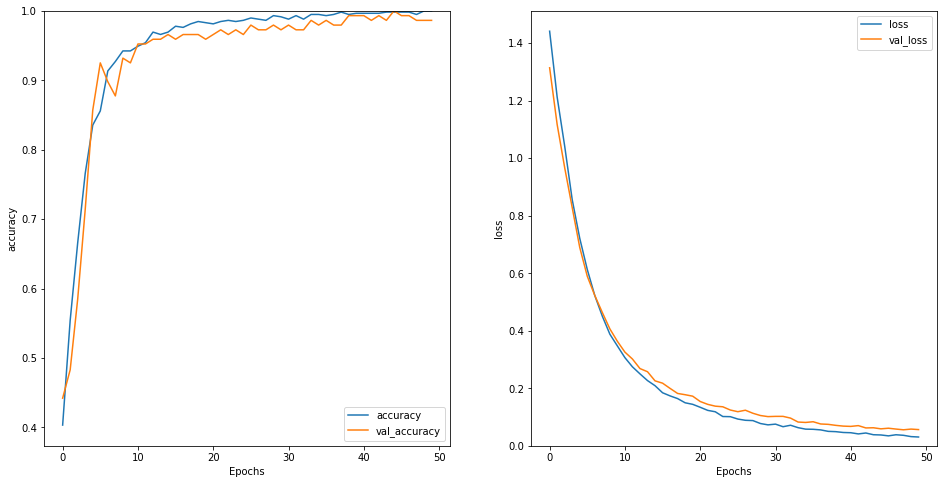

In [11]:
plt.figure(figsize=(16,8)) 
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)